## Оптимизация выполнения кода, векторизация, Numba

Материалы:
* Макрушин С.В. Лекция 3: Оптимизация выполнения кода, векторизация, Numba
* IPython Cookbook, Second Edition (2018), глава 4
* https://numba.pydata.org/numba-doc/latest/user/5minguide.html

## Задачи для совместного разбора

In [3]:
from numba import njit
import numpy as np
import pandas as pd

1. Сгенерируйте массив `A` из `N=1млн` случайных целых чисел на отрезке от 0 до 1000. Пусть `B[i] = A[i] + 100`. Посчитайте среднее значение массива `B`.

In [ ]:
A = np.random.randint(1,1000, 10**6)
A

array([416, 449, 678, ..., 331, 507, 144])

In [ ]:
def f(A):
    sums, cnt = 0, 0
    for a in A:
        b = a + 100
        sums += b
        cnt += 1
    return sums/cnt
f(A)

600.015137

In [ ]:
%timeit f(A)

366 ms ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def f1(A):
    sums, cnt = 0, 0
    for a in A:
        sums +=a
        cnt += 1
    sums += cnt*100
    return sums/cnt
f1(A)

600.015137

In [ ]:
%timeit f1(A)

184 ms ± 51.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


2. Создайте таблицу 2млн строк и с 4 столбцами, заполненными случайными числами. Добавьте столбец `key`, которые содержит элементы из множества английских букв. Выберите из таблицы подмножество строк, для которых в столбце `key` указаны первые 5 английских букв.

In [ ]:
import string
import random
tab = pd.DataFrame(np.random.randint ( 0 , 1000 ,size=( 2000000 , 4 )), columns=list('ABCD'))
randomLetter = string.ascii_letters.lower()
tab['key'] = [random.choice(randomLetter) for i in range(2_000_000)] 
tab

,A,B,C,D,key
0,149,159,551,255,g
1,251,844,615,293,b
2,841,549,400,891,w
3,743,474,886,791,d
4,592,428,732,811,u
...,...,...,...,...,...
1999995,0,861,528,794,f
1999996,180,886,569,803,a
1999997,693,871,993,124,b
1999998,797,667,197,34,q


In [ ]:
a = ['a', 'b', 'c', 'd', 'e']
tab[tab['key'].isin(a)]

,A,B,C,D,key
1,251,844,615,293,b
3,743,474,886,791,d
16,442,809,161,588,a
18,343,142,196,981,e
22,173,831,827,135,b
...,...,...,...,...,...
1999978,136,578,162,303,c
1999979,570,980,111,599,a
1999981,372,532,103,268,b
1999996,180,886,569,803,a


## Лабораторная работа 3

In [1]:
!pip install line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.9/661.9 kB 5.9 MB/s eta 0:00:00


In [2]:
%load_ext line_profiler

1. В файлах `recipes_sample.csv` и `reviews_sample.csv` (__ЛР 2__) находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца(ов) с индексами. Приведите столбцы к нужным типам.

Реализуйте несколько вариантов функции подсчета среднего значения столбца `rating` из таблицы `reviews` для отзывов, оставленных в 2010 году.

A. С использованием метода `DataFrame.iterrows` исходной таблицы;

Б. С использованием метода `DataFrame.iterrows` таблицы, в которой сохранены только отзывы за 2010 год;

В. С использованием метода `Series.mean`.

Проверьте, что результаты работы всех написанных функций корректны и совпадают. Измерьте выполнения всех написанных функций.


In [5]:
recipes = pd.read_csv('/content/recipes_sample.csv', delimiter = ',')
reviews = pd.read_csv('/content/reviews_sample.csv', delimiter = ',')
reviews['date'] = pd.to_datetime(reviews['date'], format="%Y-%m-%d")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126696 entries, 0 to 126695
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  126696 non-null  int64         
 1   user_id     126696 non-null  int64         
 2   recipe_id   126696 non-null  int64         
 3   date        126696 non-null  datetime64[ns]
 4   rating      126696 non-null  int64         
 5   review      126679 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 5.8+ MB


In [ ]:
def r1():
    sums = 0
    cnt = 0
    for i in reviews.iterrows():
        if i[1].date.year == 2010:
            sums += i[1].rating
            cnt += 1
    return sums/cnt
r1()

4.4544402182900615

In [ ]:
%time r1()

CPU times: user 7.42 s, sys: 19.2 ms, total: 7.44 s
Wall time: 7.53 s


4.4544402182900615

In [ ]:
def r2():
    sums = 0
    cnt = 0
    for i in reviews[reviews['date'].dt.year == 2010].iterrows():
        sums += i[1].rating
        cnt += 1
    return sums/cnt
r2()

4.4544402182900615

In [ ]:
%time r2()

CPU times: user 657 ms, sys: 5.69 ms, total: 663 ms
Wall time: 674 ms


4.4544402182900615

In [ ]:
def r3():
    return reviews[reviews['date'].dt.year == 2010]['rating'].mean()
r3()

4.4544402182900615

In [ ]:
%time r3()

CPU times: user 23.5 ms, sys: 0 ns, total: 23.5 ms
Wall time: 24.1 ms


4.4544402182900615

2. Какая из созданных функций выполняется медленнее? Что наиболее сильно влияет на скорость выполнения? Для ответа использовать профайлер `line_profiler`. Сохраните результаты работы профайлера в отдельную текстовую ячейку и прокомментируйте результаты его работы.

(*). Сможете ли вы ускорить работу функции 1Б, отказавшись от использования метода `iterrows`, но не используя метод `mean`?

In [ ]:
%lprun -f r1 r1()

Timer unit: 1e-09 s

Total time: 12.6791 s


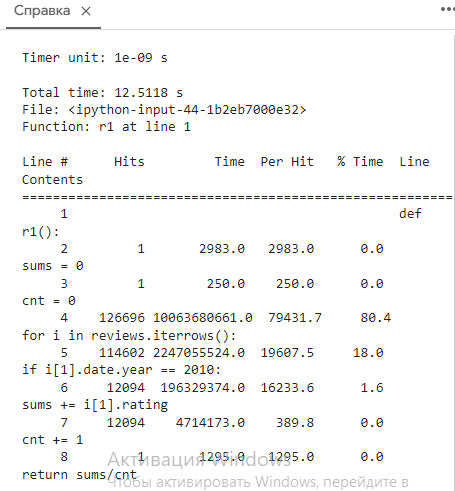

In [ ]:
%lprun -f r2 r2()

Timer unit: 1e-09 s

Total time: 1.88009 s

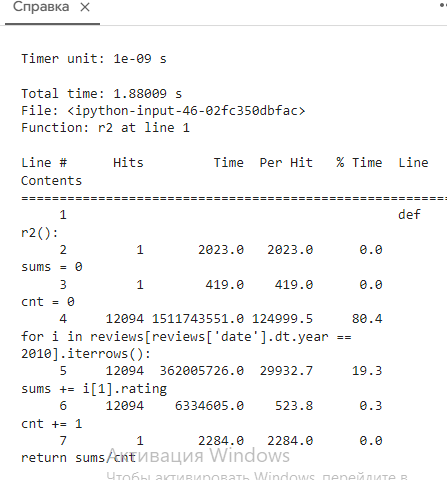

In [ ]:
%lprun -f r3 r3()

Timer unit: 1e-09 s

Total time: 0.0325096 s

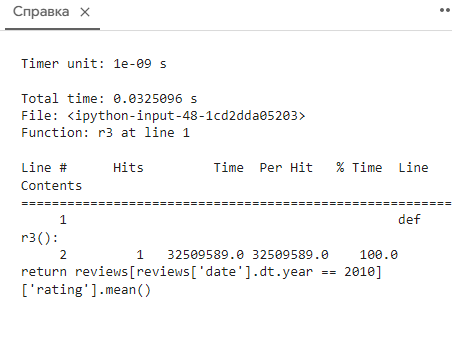

Последняя функция с использованием mean() работает значительно быстрее предыдущих

3. Вам предлагается воспользоваться функцией, которая собирает статистику о том, сколько отзывов содержат то или иное слово. Измерьте время выполнения этой функции. Сможете ли вы найти узкие места в коде, используя профайлер? Выпишите (словами), что в имеющемся коде реализовано неоптимально. Оптимизируйте функцию и добейтесь значительного (как минимум, на один порядок) прироста в скорости выполнения.

In [ ]:
def get_word_reviews_count(df):
    word_reviews = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        recipe_id, review = row['recipe_id'], row['review']
        words = review.split(' ')
        for word in words:
            if word not in word_reviews:
                word_reviews[word] = []
            word_reviews[word].append(recipe_id)
    
    word_reviews_count = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        review = row['review']
        words = review.split(' ')
        for word in words:
            word_reviews_count[word] = len(word_reviews[word])
    return word_reviews_count

In [ ]:
%%time
result_origin = get_word_reviews_count(reviews)

CPU times: user 22.2 s, sys: 238 ms, total: 22.5 s
Wall time: 22.6 s


In [ ]:
%lprun -f get_word_reviews_count get_word_reviews_count(reviews)

Timer unit: 1e-09 s

Total time: 46.5354 s

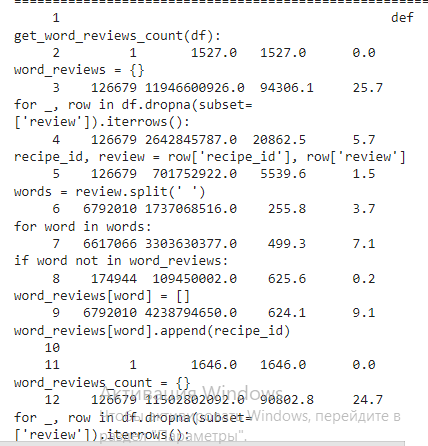

In [ ]:
def get_word_reviews_count_opt(df):
    word_reviews_count = {}
    for row in df.dropna(subset=['review'])['review'].str.split(' '):
        for word in row:
            if word in word_reviews_count:
                word_reviews_count[word] += 1
            else:
                word_reviews_count[word] = 1
    return word_reviews_count

In [ ]:
%%time
result_opt = get_word_reviews_count_opt(reviews)

CPU times: user 3.51 s, sys: 515 ms, total: 4.03 s
Wall time: 4.04 s


In [ ]:
%lprun -f get_word_reviews_count_opt get_word_reviews_count_opt(reviews)

Timer unit: 1e-09 s

Total time: 8.71564 s

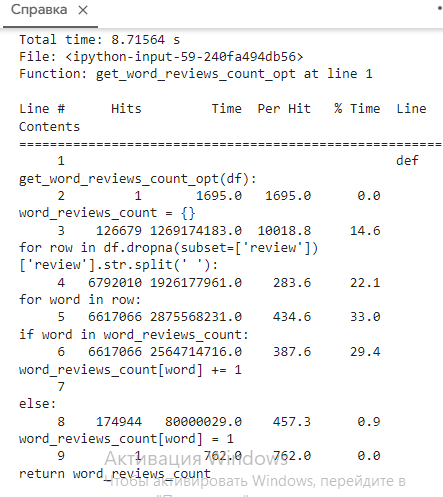

4. Напишите несколько версий функции `MAPE` (см. [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) для расчета среднего абсолютного процентного отклонения значения рейтинга отзыва на рецепт от среднего значения рейтинга по всем отзывам для этого рецепта. 
    1. Без использования векторизованных операций и методов массивов `numpy` и без использования `numba`
    2. Без использования векторизованных операций и методов массивов `numpy`, но с использованием `numba`
    3. С использованием векторизованных операций и методов массивов `numpy`, но без использования `numba`
    4. C использованием векторизованных операций и методов массивов `numpy` и `numba`
    
Измерьте время выполнения каждой из реализаций.

Замечание: удалите из выборки отзывы с нулевым рейтингом.


In [ ]:
#1 способ
def MAPE_1(rev: pd.DataFrame):
    rating_clear = rev[rev['rating'] != 0]['rating']
    mean = rating_clear.mean()
    return rating_clear.apply(lambda x: abs(mean - x)).sum() / mean * 100 / rating_clear.count()

In [ ]:
%time MAPE_1(reviews)

CPU times: user 154 ms, sys: 0 ns, total: 154 ms
Wall time: 163 ms


11.079150232267242

In [11]:
#2 способ
@njit
def MAPE_2(rev: pd.DataFrame):
    rating_clear = rev[rev['rating'] != 0]['rating']
    mean = rating_clear.mean()
    return rating_clear.apply(lambda x: abs(mean - x)).sum() / mean * 100 / rating_clear.count()

In [ ]:
#3 способ
def MAPE_3(rev: pd.DataFrame):
    rating_clear = rev[rev['rating'] != 0]['rating'].to_numpy()
    mean = rating_clear.mean()
    return np.absolute(rating_clear - mean).sum() / mean * 100 / rating_clear.shape[0]

In [ ]:
%time MAPE_3(reviews)

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 28.8 ms


11.079150232267242

In [ ]:
#4 способ
@njit
def MAPE_4_0(a: np.array):
    mean = a.mean()
    return np.absolute(a - mean).sum() / mean * 100 / a.shape[0]

In [ ]:
def MAPE_4(rev: pd.DataFrame):
    rating_clear = rev[rev['rating'] != 0]['rating'].to_numpy()
    return MAPE_4_0(rating_clear)

In [ ]:
%time MAPE_4(reviews)

CPU times: user 1.05 s, sys: 133 ms, total: 1.19 s
Wall time: 1.12 s


11.079150232261632